# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.  
Необходимо изучить рынок российского кинопроката и выявить текущие тренды.  
Уделите внимание фильмам, которые получили государственную поддержку.  
Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю.

### Шаг 1. Открыть файлы с данными и объединить их в один датафрейм. 

**Объединить данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.** 

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format',  '{:,.3f}'.format)

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
display(df_movies.head())
df_shows.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.000"
1,111000115,"61,040.000"
2,111000116,"153,030,013.400"
3,111000117,"12,260,956.000"
4,111000118,"163,684,057.790"


In [4]:
df_movies.info()
print()
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Два датафрейма будем объединять по столбцу `puNumber` .  
Для этого необходимо, чтобы в обеих таблицах в этих столбцах был одинаковый тип данных.  
Мы видим, что в датафрейме `df_movies` в столбце `puNumber` храняться в основном числа, но вероятно, имеются отличные от чисел значения.  
Найдем их и попробуем преобразовать.

In [5]:
df_movies[~df_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# в строке 804 уберем пробелы
df_movies.loc[804, 'puNumber'] = df_movies.loc[804, 'puNumber'].strip()
# в строке 1797 значение 'нет' заменим на '0'
df_movies.loc[1797, 'puNumber'] = '0'

In [7]:
# поменяем тип данных на int
df_movies['puNumber'] = df_movies['puNumber'].astype(int)

In [8]:
# объединим два датафрейма по столбцу 'puNumber'
data = df_movies.merge(df_shows, on='puNumber', how='left')

In [9]:
# для того, чтобы датафрейм выглядел более аккуратным, переименуем столбец puNumber
data.rename(columns = {'puNumber':'pu_number'}, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**  

Для объединения двух датафреймов потребовалось изменить тип данных в столбце `pu_number`.  
В обновленной таблице, помимо данных о прокатных удостоверениях, появились и сведения о прокате фильмов в российских кинотеатрах.  
Согласно информации, датафреймы объединились корректно, без потерь.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверить типы данных

- **Проверить типы данных в датафрейме и преобразовать их там, где это необходимо.**

**`show_start_date`**  - object  - заменим на datetime  

In [11]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')



**`ratings`**  - object  - заменим на float

In [12]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Видим, что помимо классических рейтинговых значений, имеются процентные значения.  
Предположим, что процент - это рейтинг кинокритиков и пользователей, тогда переведем это значение пропорционально в десятибальную шкалу. Избавимся от знака `%`, преобразуем тип данных в `float`, значения, которые больше 10, приведем к десятичной записи.

In [13]:
data['ratings']=pd.to_numeric(data['ratings'].str.replace('%',''),errors='coerce')

In [14]:
data.loc[data['ratings'] >10, 'ratings'] = data['ratings']/10

In [15]:
#data['ratings'].unique()

In [16]:
#data.info()

**Вывод**  

Для столбца `show_start_date` был применен тип `datetime` потому, что он содержит в себе дату.
Тип данных столбца с рейтингами фильмов `ratings` был преобразован в тип `float`

#### Шаг 2.2. Изучить пропуски в датафрейме

- **Объяснить, почему заполнили пропуски определённым образом или почему не стали этого делать.**

In [17]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

**`film_studio`**

In [18]:
data.query('film_studio.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.300,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.000"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.900,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В столбце `film_studio` 18 пропусков, незначительное количество для нашей выборки.  
Скорее всего это авторские фильмы, производство которых финансируется собственными средствами либо спонсорами.  
На сайте `Кинопоиск` удалось найти студию-производитель для четырех фильмов, добавим их.  
Для остальных пропусков - заменим на `нет данных`.

In [19]:
data.loc[1293, 'film_studio'] = 'Бисквит Пикчерз'
data.loc[4440, 'film_studio'] = 'Концепт Спейс'
data.loc[6104, 'film_studio'] = 'Правда Филмз'
data.loc[6180, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
data['film_studio'] = data['film_studio'].fillna('нет данных')

**`production_country`**

In [20]:
data.query('production_country.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"детский,комедия","194,527.000"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,нет данных,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN


В столбце `production_country` 2 пропуска. Как мы видим, это "Ералаш" и "Мульт личности", Российское производство.

In [21]:
data.loc[data['production_country'].isna() == True, 'production_country'] = 'Россия'

**`director`**

In [22]:
data.query('director.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.000"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.900,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,нет данных,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.700,"концерт,музыка",NaN


В столбце с данными о режиссерах `director` пропущено 9 значений. Как мы видим, это либо концерты, либо документальные фильмы. В данном случае, добавим режисера в строке "Мульт личности", а для остальных - заменим пропуски на `нет данных`.

In [23]:
data.loc[4440, 'director'] = 'Константин Эрнст'
data['director'] = data['director'].fillna('нет данных')

**`producer`**

In [24]:
data.query('producer.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.600,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.700,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.300,"мелодрама,комедия","2,700.000"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.800,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.800,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.000,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.000,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.900,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.000,"драма,мелодрама,военный",NaN


В столбце с данными о продюсерах фильмов `producer` пропущено 568 значений.  
Как мы видим, эти картины, снятые в советское время. Официально, профессии продюсер в то время не было, их роль выполнял "директор картины" или руководители структурных подразделений, отвечавшие за контент, например, редакторы отдела политики или культуры. В связи с этим, данные о продюсерах отсутсвуют. Заменим пропуски на `нет данных`.

In [25]:
data['producer'] = data['producer'].fillna('нет данных')

Столбцы **`refundable_support`**, **`nonrefundable_support`**, **`budget`** и **`financing_source`** имеют одинаковое количество пропусков (7153). Эти столбцы характеризуют государственное участие в финансировании фильмов. Попробуем найти закономерность.

In [26]:
#для удобства, добавим столбец с годом премьеры фильма.
data['year_release'] = data['show_start_date'].dt.year

In [27]:
(data.pivot_table(
    index='year_release', values=['refundable_support', 'nonrefundable_support','budget','financing_source'], aggfunc='count')
)

,budget,financing_source,nonrefundable_support,refundable_support
year_release,,,,
2010,0,0,0,0
2011,0,0,0,0
2012,0,0,0,0
2013,2,2,2,2
2014,16,16,16,16
2015,86,86,86,86
2016,61,61,61,61
2017,41,41,41,41
2018,56,56,56,56


Видим, что в 2010-2012 гг. нет ни одного фильма с господдержкой, можно предположить, что данные отсутствуют или были утеряны в момент загрузки или выгрузки. Среди указанных значений, видим их одинаковое количество по каждому году в каждом столбце. Еще можно предположить, что если и указаны данные о господдержке фильмов, то только для Российского кино. 

In [28]:
data.query('not budget.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.000,"26,500,000.000","79,411,900.000",Министерство культуры,8.100,"драма,мелодрама","365,353.600",2013
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.000,"26,000,000.000","37,142,857.000",Министерство культуры,NaN,NaN,"28,140.000",2014
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.000,"107,847,945.000","176,023,490.000",Фонд кино,5.300,"комедия,фантастика","19,957,031.500",2013
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.000,"28,000,000.000","40,574,140.000",Министерство культуры,4.200,драма,"55,917.500",2014
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.000,"25,000,000.000","40,015,122.000",Министерство культуры,6.400,драма,"232,100.000",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","980,000,000.000",Фонд кино,6.000,"история,биография,драма","717,703,185.530",2019
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.000",0.000,"190,000,000.000",Фонд кино,6.700,"мультфильм,приключения,семейный","501,069,235.000",2019
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","944,000,000.000",Фонд кино,5.700,"фантастика,боевик",NaN,2019
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.000,"30,000,000.000","46,154,000.000",Министерство культуры,5.900,драма,NaN,2019


In [29]:
data.query('production_country != "Россия" and not budget.isna()')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
1871,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.000,"46,502,299.000","86,210,067.000","Министерство культуры, Фонд кино",6.700,драма,"4,731,239.500",2014
2132,Битва за Севастополь,111001415,2015-02-20 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Новые люди"", ООО ""Студия ""К...",Россия-Украина,С.Мокрицкий,"Н.Мокрицкая, Е.Олесов",«12+» - для детей старше 12 лет,0.000,"27,510,000.000","131,000,000.000",Министерство культуры,7.500,"биография,военный,драма","401,804,461.900",2015
2537,ВСТАВАЙ И БЕЙСЯ,111008615,2015-05-05 12:00:00+00:00,Художественный,"ООО ""ЛИГА ПРОДАКШН""","Россия, Италия",Стефано Лоренци,"Жанфранко Пиччоли, Надежда Горшкова, Катерина ...",«18+» - запрещено для детей,0.000,"60,000,000.000","139,357,211.000","Министерство культуры, Фонд кино",6.400,драма,"144,040.000",2015
2580,Под электрическими облаками,111008815,2015-05-12 12:00:00+00:00,Художественный,"ООО ""Метрафильмс"", ООО ""ЛИНКЕД ФИЛМС"", ООО ""Эп...","Россия, Украина, Польша",А.Герман,А.Васильев,«16+» - для детей старше 16 лет,0.000,"30,000,000.000","100,274,436.000",Министерство культуры,6.000,драма,"4,568,857.300",2015
2771,"Милый Ханс, дорогой Петр",111010715,2015-06-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир"", Ma.ja.de Film product...","Россия, Германия, Великобритания",А.Миндадзе,"А.Миндадзе, Л.Антонова, А.Анненский, Л.Блаватн...",«16+» - для детей старше 16 лет,"15,000,000.000","35,000,000.000","134,000,000.000",Фонд кино,5.900,драма,"1,307,120.010",2015
2784,Пингвин нашего времени,111010515,2015-06-11 12:00:00+00:00,Художественный,"ЗАО ""Студия ""Ф.А.Ф."", ИКС-Фильме Креатив Пул Г...","Россия, Германия",Штефан Кромер,"Алексей Гуськов, Штефан Арндт, Андреа Шютте",«16+» - для детей старше 16 лет,0.000,"28,000,000.000","164,780,000.000",Фонд кино,4.300,"комедия,триллер","739,938.000",2015
3352,Рай (2016),111015716,2016-09-20 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр А.С.Кончаловского"", Dr...","Россия, Германия",А.Кончаловский,"А.Кончаловский, Ф.Дайле",«16+» - для детей старше 16 лет,0.000,"35,000,000.000","287,802,711.000",Министерство культуры,6.800,"военный,драма,история","51,704,986.000",2016
5842,Спитак,111004018,2018-04-20 12:00:00+00:00,Художественный,"ООО ""Телесто-фильм"", ФОНД РАЗВИТИЯ НАЦИОНАЛЬНО...","Россия, Армения",А.Котт,"Е.Гликман, Т.Варжапетян",«16+» - для детей старше 16 лет,0.000,"50,000,000.000","118,000,000.000",Министерство культуры,6.200,драма,"3,363,230.230",2018
5964,Подвал,111009118,2018-11-01 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Гейт"", Furia Film, 8Heads P...",Россия-Словакия-Чехия,И.Волошин,"Л.Филусова, Ж.Тедеева-Калинина, А.Воронкова, А...",«18+» - запрещено для детей,0.000,"30,000,000.000","111,812,387.000",Министерство культуры,6.200,"триллер,криминал","288,019.500",2018
6244,Юморист,111017918,2018-09-26 12:00:00+00:00,Художественный,"ООО ""Студия МЕТРАФИЛЬМС"", Компания ""TASSE fil...","Россия, Латвия, Чешская Республика",М.Идов,А.Васильев,«16+» - для детей старше 16 лет,0.000,"20,000,000.000","76,913,058.000",Министерство культуры,6.500,"драма,биография","21,363,842.530",2018


Из таблиц выше видим, что фильмы, снятые с господдержкой остносятся к Российскому кино (или Российское кино, снятое совместно с несколькими странами). Пропуски в значениях так же связаны с остутствием информации о государственном участии в съемках иностранных фильмов.  
Пропущенные значения в столбцах `refundable_support`, `nonrefundable_support` и `budget` оставим без изменений, а в столбце `financing_source` - заменим на `нет данных`.

In [30]:
data['financing_source'] = data['financing_source'].fillna('нет данных')

**`ratings`**  

В столбце `ratings` пропущено 966 значений. Т.к. у нас отсутствует нулевой рейтинг, для дальнейшего удобства в исследовании, заменим пропущенные значения на `0`.

In [31]:
data['ratings'] = data['ratings'].fillna(0)

**`genres`**  

Пропущенные значения в столбце `genres` (975) заменим на `нет данных`.

In [32]:
data['genres'] = data['genres'].fillna('нет данных')

**`box_office`**  

4327 пропущенных значений в столбце `box_office`. В данном случае, вероятнее всего, такое большое количество пропусков обусловленно техническим фактором. Проблемы могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц также может быть причиной. Оставим данный столбец без изменений.

In [33]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                     0
genres                      0
box_office               4328
year_release                0
dtype: int64

**Вывод**  

Были добавлены студия, страна-производитель и режисер, где это возможно.  
Пропущенные значения в столбцах `director`, `producer`, `financing_source` и `genres` были заменены на **`нет данных`** .  
Для фильмов, с пропущенным/отсутствующим рейтингом, было решено заменить значения nan на **`0`** .  
Столбцы `refundable_support`, `nonrefundable_support`, `budget` и `box_office` оставили без изменений.

#### Шаг 2.3. Изучить дубликаты в датафрейме
- **Проверить, есть ли в данных дубликаты. Описать причины, которые могли повлиять на появление дублей.**

In [34]:
#количество явных дубликатов:
data.duplicated().sum()

0

Попробуем выявить неявные дубликаты и, по возможности, обработать их.

In [35]:
data['title'].duplicated().sum()

714

**`title`**

In [36]:
data[data['title'].duplicated(keep=False)].sort_values(by='title').head(6)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.100,комедия,NaN,2012
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.100,комедия,NaN,2016
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.700,"триллер,биография,драма",NaN,2011
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.700,"триллер,биография,драма",NaN,2011
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.700,"боевик,триллер,драма",NaN,2016
3130,13 часов: Тайные солдаты Бенгази,121001016,2016-01-15 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,6.700,"боевик,триллер,драма","18,439,240.550",2016


In [37]:
# и еще для примера зайдем с другой стороны
data['title'].value_counts().head(5)

День святого Валентина_                               5
Красавчик-2                                           4
Жена путешественника во времени                       4
Белая мгла /По комиксу Грега Рукка и Стива Либера/    4
Дом грёз                                              4
Name: title, dtype: int64

In [38]:
data.query('title == "День святого Валентина_"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.700,"мелодрама,комедия",NaN,2010
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.700,"мелодрама,комедия",NaN,2010
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.700,"мелодрама,комедия",NaN,2010
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.700,"мелодрама,комедия",NaN,2010
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.700,"мелодрама,комедия",NaN,2010


Наличие дубликатов в столбцу `title` связано с тем, что у одного фильма может быть несколько прокатных удостоверений. Из таблиц выше мы видим, что хоть названия и повторяются, у фильмов разные номера прокатного удостоверения и разные даты премьеры фильмов.

**`pu_number`**

In [39]:
data[data['pu_number'].duplicated(keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.000,"мелодрама,комедия",NaN,2010
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.600,"драма,мелодрама,история",NaN,2010
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,7.400,"комедия,криминал",NaN,2010
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,6.800,"комедия,криминал",NaN,2010


В данном случае мы видим иную картину - одно прокатное удостоверение выдано нескольким фильмам. Скорее всего это ошибка и результат человеческого фактора. На наше исследование это никак не повлияет, оставим эти записи как есть.

#### Шаг 2.4. Изучить категориальные значения

- **Посмотреть, какая общая проблема встречается почти во всех категориальных столбцах;**
- **Исправить проблемные значения в поле `type`.**

К категориальным столбцам мы относим  `type`, `film_studio`, `production_country`, `director`, `producer`, `age_restriction`, `financing_source`, `genres`.

In [40]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [41]:
#уберем лишние пробелы
data['type'] = data['type'].str.strip()

In [42]:
#посмотрим еще раз на данные в категориальных столбцах
data[['film_studio', 'production_country', 'director', 'producer', 'genres']].tail(10)

,film_studio,production_country,director,producer,genres
7476,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,драма
7477,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,драма
7478,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...","комедия,фантастика,мелодрама"
7479,ВГИК,Россия,Д.Григорьев,ВГИК,нет данных
7480,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",нет данных
7481,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,нет данных
7482,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...","боевик,триллер"
7483,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,нет данных
7484,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,нет данных
7485,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,"комедия,вестерн"


Попробуем привести все значения в данных столбцах к нижнему регистру, уберем пробелы и проверим, удасться ли таким образом избавиться от неявных дубликатов.

In [43]:
for column in ['film_studio', 'production_country', 'director', 'producer', 'genres']:
    print('Для столбца:', column)
    print('Количество значений ДО попыток преобразовать столбец:', data[column].value_counts().count())
    
    data[column] = data[column].str.lower().str.strip()
    
    print('Количество значений ПОСЛЕ попыток преобразовать столбец:', data[column].value_counts().count())
    print()

Для столбца: film_studio
Количество значений ДО попыток преобразовать столбец: 5493
Количество значений ПОСЛЕ попыток преобразовать столбец: 5425

Для столбца: production_country
Количество значений ДО попыток преобразовать столбец: 950
Количество значений ПОСЛЕ попыток преобразовать столбец: 933

Для столбца: director
Количество значений ДО попыток преобразовать столбец: 4813
Количество значений ПОСЛЕ попыток преобразовать столбец: 4798

Для столбца: producer
Количество значений ДО попыток преобразовать столбец: 5350
Количество значений ПОСЛЕ попыток преобразовать столбец: 5327

Для столбца: genres
Количество значений ДО попыток преобразовать столбец: 743
Количество значений ПОСЛЕ попыток преобразовать столбец: 743



In [44]:
sorted(data['age_restriction'].unique())

['«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет']

Со столбцом `age_restriction` все в порядке, как и с последующим `financing_source`.

In [45]:
data['financing_source'].unique()

array(['нет данных', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

**`Вывод`**  

Исправили проблемные значения в столбце `type`, уменьшили количество неявных дубликатов в категориальных столбцах.  
Среди многих категориальных значений наблюдается схожая проблема: в одной ячейке перечисленно несколько наименований, которые могут быть разделены запятой, точкой или тире. Встречаются и повторяющиеся значения, такие как `комедия, фантастика` ; `комедия, вестерн`.

#### Шаг 2.5. Проверить количественные значения

- **Проверить, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?**

In [46]:
data[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.000,332.000,332.000,"3,158.000"
mean,"11,864,457.831","48,980,988.892","127,229,716.684","76,478,696.161"
std,"24,916,555.264","59,980,117.923","188,588,333.115","240,353,122.823"
min,0.000,0.000,0.000,0.000
25%,0.000,"25,000,000.000","42,000,000.000","86,239.000"
50%,0.000,"30,000,000.000","68,649,916.000","2,327,987.550"
75%,"15,000,000.000","40,375,000.000","141,985,319.500","23,979,671.025"
max,"180,000,000.000","400,000,000.000","2,305,074,303.000","3,073,568,690.790"


Следует отметить, что среди всей выборки, только у 332-х фильмов есть данные о бюджете.  
Сразу бросается в глаза нулевое медианное значение в столбце `refundable_support`. 

In [47]:
#количество картин, снятых с использование возвратных средств и без
display(len(data[data['refundable_support'] > 0]))
len(data[data['refundable_support'] == 0])

111

221

In [48]:
#количество картин, снятых с использование невозвратных средств и без
display(len(data[data['nonrefundable_support'] > 0]))
len(data[data['nonrefundable_support'] == 0])

323

9

Более 33% фильмов из нашей небольшой выборки снимались с участием возвратных средств. Стоит отметить, что под возвратными средствами подразумевается своего рода займ, который студия обязана вернуть государству после проката фильма. Отказ использовать такого рода господдержку может быть обусловлен трудностями его получения (различные ограничения для студий-производителей, необходимость поручительства) и возможные трудности, связанные с его возвратом. Нулевое медианное значение объясняется сильным разбросом значений, и тем, что медианна больее стабильна к выбросам, чем среднее.  

97% фильмов снималось с использованием невозвратных средств господдержки, что, вероятно, объясняется более привлекательными условиями.  

И рассмотрим максимальные значения каждого столбца, насколько это достоверные цифры.

In [49]:
data.query('refundable_support > 150000000 or nonrefundable_support > 300000000 or budget > 2000000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
2920,Экипаж .,111005416,2016-03-21 12:00:00+00:00,Художественный,"ооо ""студия ""тритэ"" никиты михалкова""",россия,н.лебедев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,"50,000,000.000","392,104,482.000","635,283,867.000",Фонд кино,7.600,"драма,триллер,приключения","1,402,255,390.000",2016
5653,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ооо ""студия ""тритэ"" никиты михалкова""",россия,а.мегердичев,"л.верещагин, а.златопольский, н.михалков, ооо ...",«6+» - для детей старше 6 лет,0.000,"400,000,000.000","590,192,191.000",Фонд кино,7.500,"спорт,драма","2,779,686,144.000",2017
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ооо ""кинокомпания ""ств""; ооо ""рфг корп""; ооо ""...",россия-китай,о.степченко,"с.сельянов, а.петрухин",«6+» - для детей старше 6 лет,"180,000,000.000","90,000,000.000","2,305,074,303.000",Фонд кино,5.800,"приключения,фэнтези","333,597,059.590",2019
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"зао ""дирекция кино""",россия,а.кравчук,"а.максимов, к.эрнст",«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","980,000,000.000",Фонд кино,6.000,"история,биография,драма","717,703,185.530",2019
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ооо ""арт пикчерс студия"", ооо ""водород 2011""",россия,ф.бондарчук,"ф.бондарчук, м.врубель, а.андрющенко, д.рудовский",«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","944,000,000.000",Фонд кино,5.700,"фантастика,боевик",NaN,2019


Солгасно открытым источникам в интернете удалось найти следующую информацию:
-  Экипаж -  "«Экипаж» потребовал 442,1 миллиона рублей, а сборы составили 635,3 миллиона"  
Источник: https://bankstoday.net/last-articles/kak-gosudarstvo-finansiruet-sozdanie-filmov-i-pochemu-oni-provalivayutsya-v-prokate-rasskazyvayut-uchastniki-kinorynka
-  Движение вверх -  "авторы фильма «Движение вверх», при всей успешности картины в прокате, не должны были вернуть ни копейки из взятых 400 миллионов рублей"; "«Движение вверх» (кассовые сборы 2 943 563 880 рублей при бюджете 590 192 191 рублей)"  
Источник: https://bankstoday.net/last-articles/kak-gosudarstvo-finansiruet-sozdanie-filmov-i-pochemu-oni-provalivayutsya-v-prokate-rasskazyvayut-uchastniki-kinorynka
-  Тайна печати дракона -  "На производство одного из самых громких российских провалов, фильма «Тайна печати дракона», на безвозвратной основе было выделено 90 млн рублей (270 млн рублей в общей сложности). При заявленном бюджете в 2,3 млрд рублей на данный момент проект собрал лишь 332 млн рублей."  
Источник: https://www.kinopoisk.ru/media/news/3424657/
-  Союз спасения -  "компания получила 400 миллионов на «Союз Спасения», который при бюджете в 980 млн рублей собрал 718 миллионов"  
Источник: https://www.kinopoisk.ru/media/article/4005463/comment/2480675/
-  Вторжение -  общий бюджет 944 млн.руб. "Размер безвозвратных средств составил 400 млн.руб."  
Источник: https://www.kinopoisk.ru/film/1045582/box/  
Источник: https://dzen.ru/media/storyfile/vtorjenie-bondarchuka-poluchilo-ot-gosudarstva-400-millionov-v-podarok-za-chto-5e15e31fec575b00b10eff06  

Данная информация полностью подтверждает наши цифры из датафрейма. 

.  
.  
Посмотрим на кинокартины, бюджет которых составил 0.

In [50]:
display(data.query('budget == 0')['title'].count())
data.query('budget == 0')

17

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0.000,"23,000,000.000",0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,"10,234,016.100",2014
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0.000,"75,000,000.000",0.000,Фонд кино,6.600,драма,"446,163,511.000",2015
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,"10,000,000.000","70,000,000.000",0.000,Фонд кино,7.800,"боевик,драма,криминал","196,572,438.400",2015
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.000",0.000,0.000,Фонд кино,6.200,"комедия,фэнтези","67,418,974.800",2015
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,"60,000,000.000","100,000,000.000",0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези","184,487,551.400",2015
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0.000,"59,000,000.000",0.000,Фонд кино,6.300,"комедия,драма","1,957,738.510",2015
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0.000,"35,000,000.000",0.000,Фонд кино,5.100,"комедия,мелодрама","72,937,783.200",2015
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0.000,"6,000,000.000",0.000,Министерство культуры,4.300,комедия,"15,362,931.430",2016
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,"19,000,000.000","51,000,000.000",0.000,Фонд кино,6.300,"комедия,мелодрама","70,299,052.000",2016
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0.000,"250,000,000.000",0.000,Фонд кино,5.600,фантастика,"1,038,321,489.000",2016


17 картин с нулевым бюджетом. Но при этом мы видим наличие возвратных/невозвратных средств государственной поддержки.  
Согласно данным выше, и логике, мы понимаем, что бюджет картины может складываться не только из государственного финансирования, могут быть привлечены и другие средства, спонсорство, реклама и тд., поэтому было бы неправильно просто сложить два столбца с возвратными и невозвратными средствами.  

Из открытых источников удалось найти размер бюджета для 15-ти картин. Для нашей небольшой выборки лишним не будет).

In [51]:
data.loc[data['title'] == '14+', 'budget'] = 30000000
data.loc[data['title'] == 'Дуxless 2', 'budget'] = 140000000
data.loc[data['title'] == 'Воин (2015)', 'budget'] = 115000000
data.loc[data['title'] == 'Бармен.', 'budget'] = 60000000
data.loc[data['title'] == 'Савва. Сердце воина', 'budget'] = 1000000000
data.loc[data['title'] == 'Срочно выйду замуж', 'budget'] = 84000000
data.loc[data['title'] == 'Помню - не помню!', 'budget'] = 85800000
data.loc[data['title'] == 'Любовь с ограничениями', 'budget'] = 110000000
data.loc[data['title'] == 'Притяжение (2016)', 'budget'] = 380000000
data.loc[data['title'] == 'Чудо-юдо', 'budget'] = 105500000
data.loc[data['title'] == 'Мифы', 'budget'] = 50000000
data.loc[data['title'] == 'Селфи', 'budget'] = 115000000
data.loc[data['title'] == 'Два хвоста', 'budget'] = 110000000
data.loc[data['title'] == 'Принцесса и дракон', 'budget'] = 116000000
data.loc[data['title'] == 'Баба Яга', 'budget'] = 220000000

Для оставшихся двух картин ссумируем размер возвратных и невозвратных средств господдержки.

In [52]:
data.loc[data['budget'] == 0, 'budget'] = data['refundable_support'] + data['nonrefundable_support']

Проверим есть ли такие фильмы, в которых размер возвратных и невозвратных средств превышает общий бюджет и удостоверимся, что все нулевые бюджеты были заполненны.

In [53]:
display(data.query('refundable_support + nonrefundable_support > budget'))
data.query('budget == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release


In [54]:
# посмотрим на кинокартины, кассовый сбор которых равен нулю.
display('Количество кинокартин с нулевым кассовым сбором:', data.query('box_office == 0')['title'].count())
data.query('box_office == 0')

'Количество кинокартин с нулевым кассовым сбором:'

24

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release
66,Анна Павлова,111011013,2013-12-19 12:00:00+00:00,Художественный,"совместное производство киностудия ""мосфильм"",...","ссср, франция, англия, куба, гдр",эмиль лотяну,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.700,"драма,биография,музыка",0.000,2013
237,Подранки,111007613,2013-10-18 12:00:00+00:00,Художественный,"киностудия ""мосфильм""",ссср,н.губенко,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,8.200,драма,0.000,2013
596,Запах вереска,111003012,2012-05-23 12:00:00+00:00,Художественный,"ооо ""студия рим""",россия,а.магомедов,"м.балашова, е.миронов",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.300,комедия,0.000,2012
914,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07 12:00:00+00:00,Художественный,"ма йа де фикшн, лемминг филм, беларусьфильм, д...",германия - нидерланды - беларусь - россия - ла...,сергей лозница,хайно декерт,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,6.500,"драма,военный,история",0.000,2012
932,Письмо для Момо,124002912,2012-10-25 12:00:00+00:00,Анимационный,"кадокава пикчерз, продакшнз и джи, токио броад...",япония,окиура хироюки,"хироюки икеда, митсухиса ишикава, кацзуя хамана",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.400,"аниме,мультфильм,драма",0.000,2012
933,Летние войны,124002812,2012-10-25 12:00:00+00:00,Анимационный,"медхауз, ниппон телевижн нетуорк корпорейшн, к...",япония,мамору хосода,"такафуми ватанабэ, такуя ито, сэйдзи окуда, юи...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.700,"аниме,мультфильм,фантастика",0.000,2012
976,Гарегин Нжде,131000213,2013-04-23 12:00:00+00:00,Художественный,"эй джи кей продакшнз, пан армениан медиа групп",армения,грач кешишян,грач кешишян,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.900,биография,0.000,2013
1126,Марафон,111006712,2012-12-18 12:00:00+00:00,Художественный,"ооо ""синема арт студио""",россия,к.оганесян,к.оганесян,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,5.500,"комедия,мелодрама",0.000,2012
1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,121014613,2013-06-11 12:00:00+00:00,Художественный,депф оф филд,сша,пол вайц,"пол вайц, керри кохански, эндрю миано",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,5.800,"мелодрама,комедия,драма",0.000,2013
1559,Последняя любовь мистера Моргана /По роману Фр...,121002614,2014-02-11 12:00:00+00:00,Художественный,"камински штим фильм, бавариа пикчерз, сенатор ...",германия - бельгия - сша -франция,сандра неттельбек,"франк камински, астрид камке, филипп кройцер, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.900,драма,0.000,2014


На сайте Кинопоиск(https://www.kinopoisk.ru/) удалось найти информацию о прокате в российских кинотеатрах для 9 фильмов. Немного восполним наш датафрейм.

In [55]:
data.loc[data['title'] == 'Марафон', 'box_office'] = 2830000
data.loc[data['title'] == 'Экзамен для двоих /По роману Джин Ханфф Корелитц/', 'box_office'] = 10950000
data.loc[data['title'] == 'Весёлые ребята ;)', 'box_office'] = 5280000
data.loc[data['title'] == 'Анжелика, маркиза ангелов', 'box_office'] = 22000000
data.loc[data['title'] == 'Кино про Алексеева', 'box_office'] = 2280000
data.loc[data['title'] == 'Прогулка по солнечному свету', 'box_office'] = 6200000
data.loc[data['title'] == 'Москва, я люблю тебя', 'box_office'] = 35100000
data.loc[data['title'] == 'Стать Джоном Ленноном', 'box_office'] = 3580000
data.loc[data['title'] == 'Дерево.', 'box_office'] = 1150000

**Вывод**  

В столбце `budget` были обнаружены нулевые значения, в то время, как имелась информация об участии государственного финансирования в съемках фильмов (возвратные/невозвратные средства, которые должны были входить в общую сумму бюджета). Все 17 значений были заполнены.  
Немного восполнили информацию о сборах в российских кинотеатрах (столбец `box_office`).  
Проверили на аномальность максимальные значения, описывающие размер бюджета, потраченный на съемки (данные корректны).  


- **Создайть столбец с информацией о годе проката. Выделить год из даты премьеры фильма.**  

**`Выполнено ранее.`**

- **Создайть два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.**

In [56]:
# функция для имени и фамилии главного режиссера
#def take_first_director(row):
    #return row['director'].split(',')[0].strip()
# функция для основного жанра
#def take_first_genre(row):
    #return row['genres'].split(',')[0].strip()

In [57]:
# функция для получения первого значения из списка
def take_first_part(column):
    return column.split(',')[0].strip()

In [58]:
data['main_director'] = data['director'].apply(take_first_part)
data['main_genre'] = data['genres'].apply(take_first_part)

In [59]:
#data.sample(5)

- **Посчитать, какую долю от общего бюджета фильма составляет государственная поддержка.**

In [60]:
data['share_of_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

**Вывод**  

На этапе предобработки были заменены типы данных в столбцах `show_start_date` и `ratings` .  
Обработан рейтинг кинокартин в процентном выражении.  
Полностью повторяющихся строк в нашем датафрейме нет, но сократили количество неявных дубликатов.  
Для столбцов, в которых удалось найти достоверную информацию - заполнили пропуски, для остальных - заменили пропущенные значения на "нет данных" или на 0.  
Выявили проблемы в данных. Одно прокатное удостоверение выдано нескольким фильмам, это результат человеческого фактора. В категориальных переменных обнаружилась следующая проблема - несколько категорий в одной ячейке, перечисленные через запятую, точку или тире. Также встречаются опечатки - ошибка, допущенная в момент заполнения данных. Часть рейтингов представленна в процентном выражении.  
Добавили новые столбцы в наш датафрейм для дальнейшего проведения анализа.

### Шаг 3. Проведение исследовательского анализа данных


- **Посмотреть, сколько фильмов выходило в прокат каждый год. Обратить внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.**

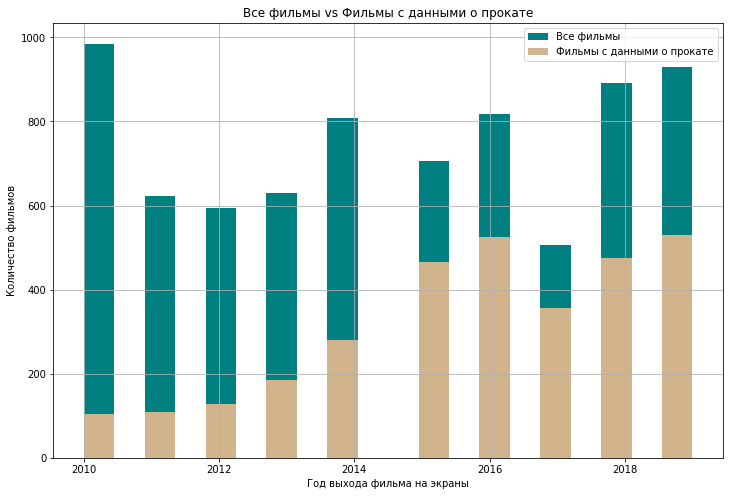

In [68]:
# количество фильмов по годам всего vs с данными о прокате
data.hist('year_release', bins=20, figsize = (12,8), color='teal', label='Все фильмы')
ax = (data[data['box_office'].notna()]['year_release']).hist(bins=20, color='tan', label='Фильмы с данными о прокате')
ax.set_title('Все фильмы vs Фильмы с данными о прокате')
plt.xlabel('Год выхода фильма на экраны')
plt.ylabel('Количество фильмов')
plt.legend(loc='upper right')
plt.show();

In [62]:
box = data.pivot_table(index='year_release', values='title', aggfunc='count')
bax = data.pivot_table(index='year_release', values='box_office', aggfunc={'count','sum'})
boax = box.merge(bax, how='right', on='year_release')
boax.rename(columns={'title': 'all_movies', 'count': 'movies_with_box', 'sum': 'total_box'}, inplace=True)
boax['share'] = boax['movies_with_box']/boax['all_movies']
boax['year'] = boax.index
boax

,all_movies,movies_with_box,total_box,share,year
year_release,,,,,
2010,985,105,"42,258,654.000",0.107,2010
2011,622,109,"14,102,765.000",0.175,2011
2012,593,128,"9,785,423.000",0.216,2012
2013,630,184,"62,749,706.200",0.292,2013
2014,807,279,"7,458,711,859.200",0.346,2014
2015,705,465,"39,497,365,196.400",0.660,2015
2016,818,526,"47,866,299,741.910",0.643,2016
2017,505,357,"48,563,707,217.510",0.707,2017
2018,891,475,"49,668,403,134.320",0.533,2018


Самое большое количество фильмов выпущено в 2010 году. В 2011-2013 гг. виден спад, но количество кинокартин находится примерно на одном уровне (600 фильмов). Меньше всего выпустили картин в 2017 году и с 2018 года наблюдается увеличение выходящих в прокат фильмов. Интересно, что хоть в 2017 году вышло меньше всего фильмов (505 шт.), по сборам этот год показывает один из лучших результатов (более 48 млрд.руб.). Самыми кассовыми фильмами за этот год стали "Пираты Карибского моря: Мертвецы не рассказывают сказки", "Последний богатырь", "Форсаж 8" и "Притяжение". Источник: "https://www.kinopoisk.ru/box/year/2017/type/rus/cur/RUB/"  

Иную картину мы видим среди фильмов с указанными данными о сборах в кинотеатрах. Больше всего имеется данных о прокате картин, снятых в 2016 и 2019 году. Меньше всего информации о сборах в 2010-2013 гг. Это может быть связано с тем, что с 2010 года Министерством культуры РФ была создана Единая автоматизированная информационная система (ЕАИС) сведений о показах фильмов в кинозалах. "Внедрение заняло более 4-х лет и наладить процесс удалось только к 2014 году, когда к системе подключены 95% современных кинотеатров". Источник: "https://cinemaplex.ru/2014/05/22/fond-kino-stal-operatorom-eais.html"

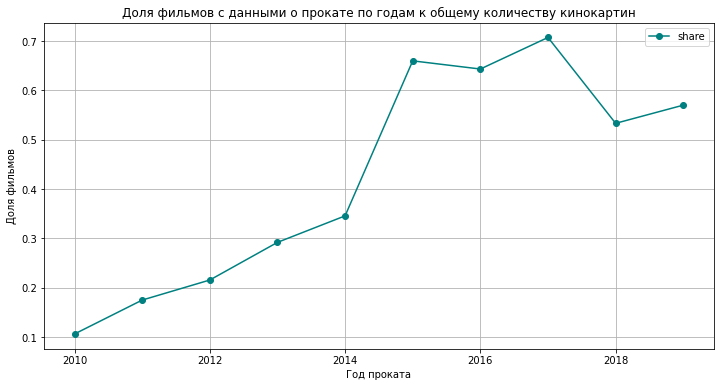

In [63]:
# доля фильмов с данными о прокате
boax.plot(x='year', y= 'share', style='o-', figsize=(12, 6), color='teal', grid = True)
plt.title('Доля фильмов с данными о прокате по годам к общему количеству кинокартин')
plt.xlabel('Год проката')
plt.ylabel('Доля фильмов')
plt.show()

In [64]:
boax['share'].describe()

count   10.000
mean     0.425
std      0.223
min      0.107
25%      0.235
50%      0.439
75%      0.625
max      0.707
Name: share, dtype: float64

-  Доля фильмов с данными о сборах в кинотеатрах имеет тенденцию к росту, до 2014 года плавную/равномерную, далее довольно резкое увеличение почти в два раза. Это так же объясняется найденной информацией, что к 2014 году удалось наладить процесс получения данных о прокате картин.  
-  Интересной особенностью является 2017 год. При самом маленьком количестве фильмов, выпущенных в этот год, имеет самый большой показатель о количестве фильмов с данными о прокате в кинотеатрах, и, соответственно, самую высокую долю - 0,71.  
-  В среднем, доля фильмов с указанной информацией о прокате в кинотеатрах составляет - 0.43.

- **Изучить, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?**

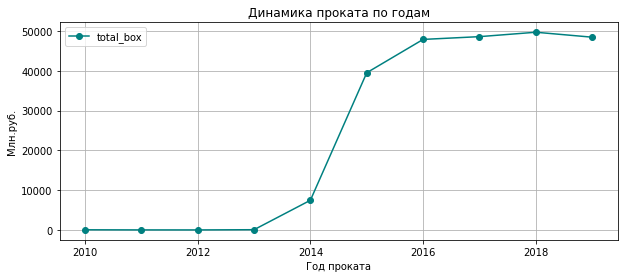

In [65]:
boax['total_box'] = boax['total_box'] / 1000000
boax.plot(x='year', y='total_box', style='o-', figsize=(10, 4), color='teal', grid = True)
plt.title('Динамика проката по годам')
plt.xlabel('Год проката')
plt.ylabel('Млн.руб.')
plt.show()

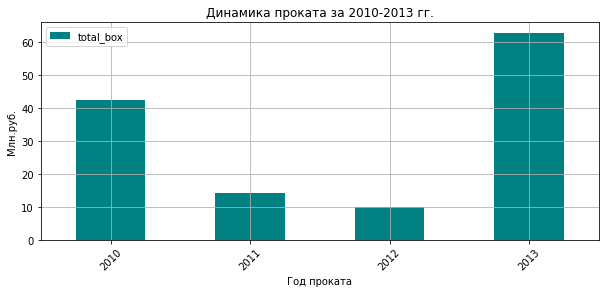

In [66]:
# посмотрим поближе данные за 2010-2013 гг.
boax.query('year < 2014').plot(kind = 'bar', y='total_box', style='o-', figsize=(10, 4), color='teal', grid = True)
plt.title('Динамика проката за 2010-2013 гг.')
plt.xlabel('Год проката')
plt.ylabel('Млн.руб.')
plt.xticks(rotation=45)
plt.show()

Резкий рост сборов наблюдается с 2014 года. Помимо того, что индустрия безусловно развивается, растет, появляются новые технологии, картины снимаются на высоком уровне, этот рост может быть связан и с ранее найденной информацией, о налаживании процессов сбора необходимх сведений; с 2014 года, вероятно, информация о прокате предоставляется пракически в полном объеме.  
Минимальные суммы сборов наблюдаются в 2011 и 2012 годах (14 млн.руб. и 10 млн.руб.)  
Максимальная сумма сборов была в 2018 - более 49 миллиардов рублей. 2017 и 2019 года показали суммы сборов в 48,5 млрд.руб. 

- **С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.**

In [67]:
mean_median_box = data.groupby('year_release').agg(
    box_mean=('box_office', 'mean'),
    box_median=('box_office', 'median')).reset_index()
mean_median_box

,year_release,box_mean,box_median
0,2010,"402,463.371","1,820.000"
1,2011,"129,383.165","3,000.000"
2,2012,"76,448.617","5,880.000"
3,2013,"341,031.012","3,565.000"
4,2014,"26,733,734.262","20,400.000"
5,2015,"84,940,570.315","4,920,933.000"
6,2016,"91,000,569.852","3,846,679.410"
7,2017,"136,032,793.326","9,968,340.000"
8,2018,"104,565,059.230","8,891,102.210"
9,2019,"91,369,261.848","4,627,798.345"


In [68]:
# приведем значения к миллионам
mean_median_box['box_mean'] = mean_median_box['box_mean'] / 1000000
mean_median_box['box_median'] = mean_median_box['box_median'] / 1000000

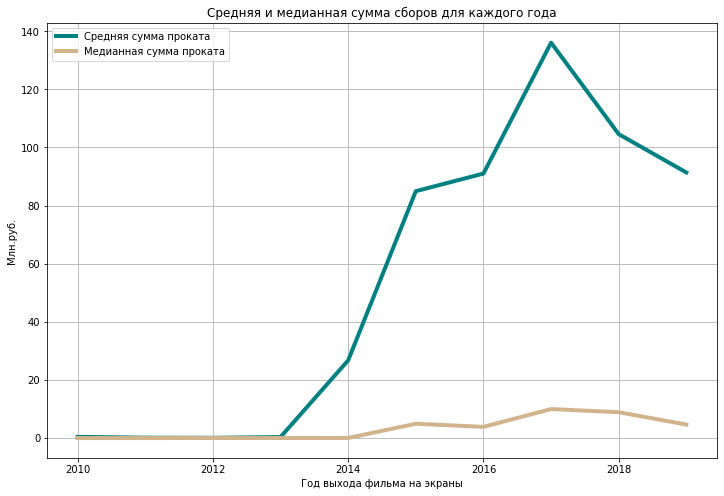

In [69]:
fig = plt.figure(figsize=(12, 8))
_ = plt.plot(mean_median_box['year_release'], mean_median_box['box_mean'], color='teal', linewidth=4, label='Средняя сумма проката')
_ = plt.plot(mean_median_box['year_release'], mean_median_box['box_median'], color='tan', linewidth=4, label='Медианная сумма проката')
plt.legend()
plt.title('Средняя и медианная сумма сборов для каждого года')
plt.xlabel('Год выхода фильма на экраны')
plt.ylabel('Млн.руб.')
plt.grid()
plt.show()

На графике хорошо видно, как сильно различаются средние и медианные значения. Это говорит о том, что данные о сборах в кинотеатрах в нашем датафрейме необнородны. К тому же, среднее значение очень сильно подвержено выбросам, в то время, как медианное это все сглаживает. Не стоит забывать, что, вероятно, отсутствуют данные за более ранние года (до 2014г.).   
Самые высокие значения средней и медианы мы видим в 2017г. Самые низкие средние и медианные значения в период 2010-2014гг. 

- **Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположить, с чем это может быть связано.**

In [70]:
from_2015 = data.query('year_release >= 2015 and box_office.notna()')

In [71]:
from_2015.pivot_table(index='age_restriction', values='box_office', aggfunc={'count','sum'})

,count,sum
age_restriction,,
«0+» - для любой зрительской аудитории,91,"809,077,425.970"
«12+» - для детей старше 12 лет,348,"60,619,446,628.330"
«16+» - для детей старше 16 лет,805,"76,034,733,643.630"
«18+» - запрещено для детей,792,"40,759,615,572.120"
«6+» - для детей старше 6 лет,317,"55,798,610,799.680"


Самые большие сборы в прокате показали фильмы для возрастной категории 16+ (76 миллиардов рублей).  
Меньше всего собрали фильмы, подходящие для любово возраста 0+ (800 миллионов рублей).  
Больше всего картин снимается для возрастной аудитории 16+ и 18+ (805 шт. и 792 шт. соответственно).  
За период 2015-2019 гг. меньше всего выпустили картин для зрителей без ограничений по возрасту 0+ (91 фильм)

In [72]:
plot_2015 = from_2015.copy()
plot_2015['box_office'] = plot_2015['box_office'] / 1000000

In [73]:
plot_2015 = plot_2015.pivot_table(index='year_release', columns = 'age_restriction', values='box_office', aggfunc='sum')
plot_2015

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_release,,,,,
2015,379.055,"13,616.082","11,368.121","5,432.308","8,701.799"
2016,150.229,"12,204.447","16,664.549","6,793.930","12,053.146"
2017,229.599,"7,851.428","18,745.043","9,651.496","12,086.142"
2018,32.449,"14,267.292","16,503.602","8,760.086","10,104.975"
2019,17.746,"12,680.199","12,753.419","10,121.796","12,852.549"


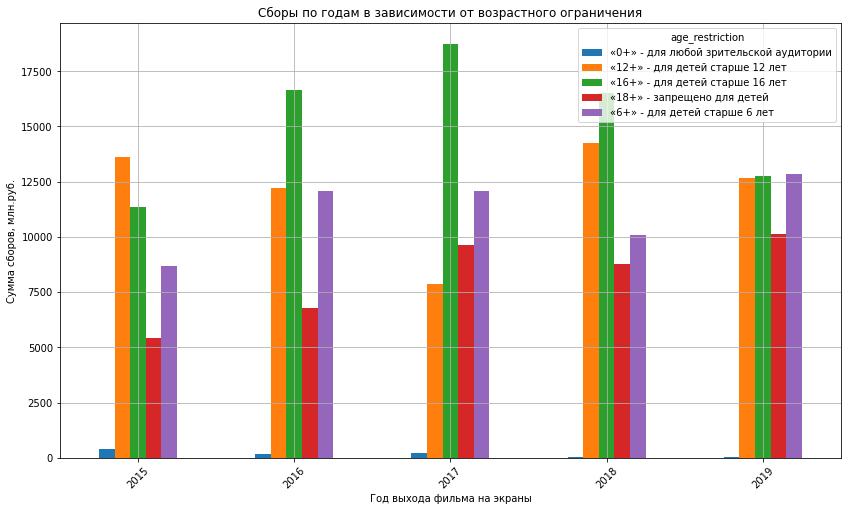

In [74]:
plot_2015.plot(kind='bar', grid = True, figsize=(14,8))
plt.title('Сборы по годам в зависимости от возрастного ограничения')
plt.xlabel('Год выхода фильма на экраны')
plt.ylabel('Сумма сборов, млн.руб.')
plt.xticks(rotation=45)
plt.show()

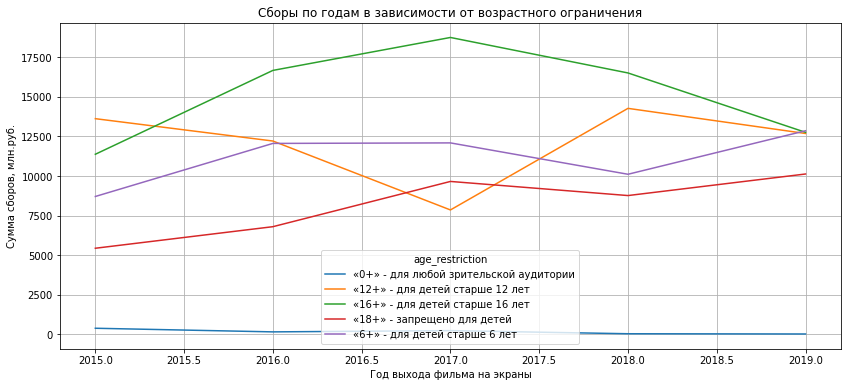

In [75]:
plot_2015.plot(grid = True, figsize=(14,6))
plt.title('Сборы по годам в зависимости от возрастного ограничения')
plt.xlabel('Год выхода фильма на экраны')
plt.ylabel('Сумма сборов, млн.руб.')
plt.show()

У фильмов без ограничения по возрасту 0+ заметна тенденция к спаду по годам.  
Для картин с категорией 18+ - наоборот, наблюдается рост проката, в 2015 году он составлял 5,5 млрд. руб., а в 2019 г. уже более 10 млрд. рублей.  
Фильмы для детей старше 6 лет начиная с 2015 года показывают положительный рост ( более 12 млрд.), менее прибыльным стал 2018 год (10 млрд.рублей).  
Сборы в кинотеатрах фильмов с категорией 12+ снижаются в период 2015-2017 гг. с 13 миллиардов рублей до 7-ми. Возможно, это всязано с тем, что подростки предпочетают мобильные соцсети и интернет походам в кинотеатры. Самые большие сборы были в 2018 году и составили 14,3 млрд.рублей. В этот год вышли такие кассовые фильмы как "Аквамен", "Первому игроку приготовиться", "Алита: Боевой ангел" и "Человек-паук: через вселенные".  
Фильмы с возрастным ограничением 16+ начиная с 2016 года имеют самые высокие показатели по сборам. В 2019 году заметен спад (до 12,7 миллиардов). Самым прибыльным оказался 2017 год (более 18,7 млрд.руб.), что может быть связано с  выходом в прокат фильмов киновселенных MARVEL и DC и самого кассового фильма этого года "Пираты Карибского моря: Мертвецы не рассказывают сказки"(https://www.kinopoisk.ru/box/year/2017/type/rus/cur/RUB/top100/list/).

**`Вывод`**  

Лидирующим годом, по количеству выпущенных фильмов, стал 2010 год (985 кинокартин), второе место занимает 2019 год с количеством 930 фильмов. Меньше всего выпустили фильмов в 2017 году (505), но при этом, год показал один из лучших результатов по кассовым сборам - более 48 миллиардов рублей и самый высокий показатель о количестве фильмов с данными о прокате в кинотеатрах (0,71). 

С 2014 года мы видим рост количества фильмов с данными о сборах в кинотеатрах, что объясняется внедрением Министерством культуры РФ автоматизированной системы, по сбору сведений о показах фильмов в кинозалах. В связи с этим растет и показатель доли фильмов с данными о сборах. В среднем, доля фильмов с указанной информацией о прокате в кинотеатрах составляет - 0.43.  

Резкий рост суммы сборов по годам наблюдается с 2014 года. С 2016 года его можно назвать стабильно высоким (относительно других лет) более 47 миллиардов рублей за каждый год. Это может быть связано с развитием рынка киноиндустрии, возросшим интересом аудитории, строительством новых кинозалов по всей стране, принятыми мерами по борьбе с пиратством. Минимальные суммы сборов наблюдаются в 2011 и 2012 годах (14 млн.руб. и 10 млн.руб. соответственно).  

Из проведенного анализа, можно сделать вывод, что возрастные ограничения аудитории влияют на сборы фильмов в прокате. Так самые большие сборы в прокате показали фильмы для возрастной категории 16+ (76 миллиардов рублей). Эта возрастная категория лидирует и по количеству выпущенных фильмов - 805 кинокартин, второе место занимает категория 18+ (792 фильма). Меньше всего собрали фильмы без возрастных ограничений 0+ (800 миллионов рублей), у них же и самое низкое значение количества выпущенных работ - 91 фильм.  

### Шаг 4. Исследовать фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [76]:
# датафрейм с данными о господдержке
state_support = data.query('financing_source != "нет данных"')

# удалим ненужные столбцы
state_support = state_support.drop(
    ['pu_number', 'production_country', 'show_start_date', 'film_studio', 'director', 'producer','genres'], axis=1)

# добавим столбец с общей суммой поддержки
state_support['total_support'] = state_support['refundable_support'] + state_support['nonrefundable_support']

# добавим столбец с окупаемостью фильма (очень грубо будем предполагать, что если прокат больше бюджета, то окупился)
state_support['movie_payback'] = state_support['box_office'] - state_support['budget']

state_support.tail(5)

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_release,main_director,main_genre,share_of_budget,total_support,movie_payback
7464,Союз спасения,Художественный,«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","980,000,000.000",Фонд кино,6.000,"717,703,185.530",2019,а.кравчук,история,0.510,"500,000,000.000","-262,296,814.470"
7466,Иван Царевич и Серый Волк 4,Анимационный,«6+» - для детей старше 6 лет,"100,000,000.000",0.000,"190,000,000.000",Фонд кино,6.700,"501,069,235.000",2019,д.шмидт,мультфильм,0.526,"100,000,000.000","311,069,235.000"
7474,Вторжение,Художественный,«12+» - для детей старше 12 лет,"100,000,000.000","400,000,000.000","944,000,000.000",Фонд кино,5.700,NaN,2019,ф.бондарчук,фантастика,0.530,"500,000,000.000",NaN
7476,Я свободен,Художественный,«12+» - для детей старше 12 лет,0.000,"30,000,000.000","46,154,000.000",Министерство культуры,5.900,NaN,2019,и.северов,драма,0.650,"30,000,000.000",NaN
7478,(Не)идеальный мужчина,Художественный,«12+» - для детей старше 12 лет,"40,000,000.000","60,000,000.000","150,147,502.000",Фонд кино,4.500,NaN,2019,м.бальчюнас (псевдоним м.вайсберг),комедия,0.666,"100,000,000.000",NaN


In [77]:
# для дальнейшего визуального удобства приведем "финансовые" столбцы к миллионам
columns = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'total_support', 'movie_payback']
for column in columns:
    state_support[column] = state_support[column] / 1000000
    
state_support.tail(5)   

,title,type,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,box_office,year_release,main_director,main_genre,share_of_budget,total_support,movie_payback
7464,Союз спасения,Художественный,«12+» - для детей старше 12 лет,100.000,400.000,980.000,Фонд кино,6.000,717.703,2019,а.кравчук,история,0.510,500.000,-262.297
7466,Иван Царевич и Серый Волк 4,Анимационный,«6+» - для детей старше 6 лет,100.000,0.000,190.000,Фонд кино,6.700,501.069,2019,д.шмидт,мультфильм,0.526,100.000,311.069
7474,Вторжение,Художественный,«12+» - для детей старше 12 лет,100.000,400.000,944.000,Фонд кино,5.700,NaN,2019,ф.бондарчук,фантастика,0.530,500.000,NaN
7476,Я свободен,Художественный,«12+» - для детей старше 12 лет,0.000,30.000,46.154,Министерство культуры,5.900,NaN,2019,и.северов,драма,0.650,30.000,NaN
7478,(Не)идеальный мужчина,Художественный,«12+» - для детей старше 12 лет,40.000,60.000,150.148,Фонд кино,4.500,NaN,2019,м.бальчюнас (псевдоним м.вайсберг),комедия,0.666,100.000,NaN


**`Сумма господдержки по годам`**

In [78]:
# посмотрим на общие суммы господдержки по годам, млн.руб.
state_support.pivot_table(index='year_release', values='total_support', aggfunc='sum')

,total_support
year_release,
2013,134.348
2014,572.002
2015,"3,656.241"
2016,"4,303.155"
2017,"3,183.972"
2018,"3,446.969"
2019,"4,904.000"


In [79]:
# посмотрим какая организация и в каком размере финансировала производство кинокартин
who_gave = state_support.pivot_table(
    index='year_release', columns='financing_source', values='total_support', aggfunc='sum').reset_index()
who_gave

financing_source,year_release,Министерство культуры,"Министерство культуры, Фонд кино",Фонд кино
0,2013,26.500,NaN,107.848
1,2014,211.500,159.502,201.000
2,2015,"1,100.810",319.382,"2,236.049"
3,2016,749.851,469.200,"3,084.104"
4,2017,351.000,64.347,"2,768.625"
5,2018,926.000,55.000,"2,465.969"
6,2019,"1,471.000",118.000,"3,315.000"


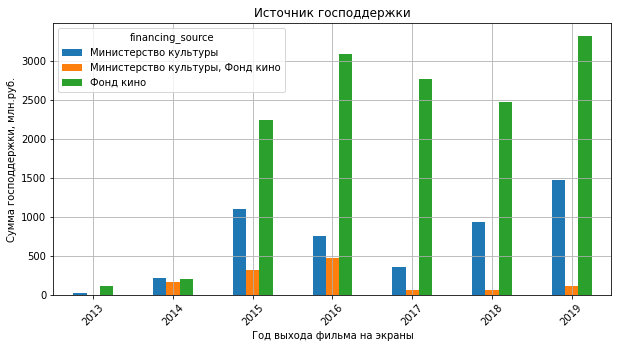

In [80]:
who_gave.plot(kind='bar', x='year_release', grid = True, figsize=(10,5))
plt.title('Источник господдержки')
plt.xlabel('Год выхода фильма на экраны')
plt.ylabel('Сумма господдержки, млн.руб.')
plt.xticks(rotation=45)
plt.show()

С 2014 года виден сильный скачек в суммарных объема государственной поддержки. Если в 2014 году сумма господдержки составила 572 миллиона рублей, то в 2015 году эта сумма привысила уже 3,5 миллиардов. Вероятно, ранее фонды не раскрывали конкретные суммы, которые они направляют на поддержку того или иного проекта. Начиная с 2015 года общие суммы господдержки варьируют по годам, но не снижаются ниже 3,1 миллиардов рублей. Максимальная сумма господдержки составила более 4,9 млрд.руб. в 2019 году.  

Что касается распределения бюджета, каждый год государство выделяет средства на кино и у этих денег есть два центра распределения: Фонд кино и Министерство культуры.  Из таблицы и графика мы видим, что начиная с 2015 года средства, выделенные Фондом кино, значительно превышают средства, финансированные  Министерством культуры.  Это объясняется тем, что Фонд кино финансирует фильмы для массовой аудитории, а Министерство культуры выделяет деньги на дебюты, авторское, документальное и детское кино (https://www.kinopoisk.ru/media/article/4005463/).
Максимальные суммы были выданы в 2019 году - Фонд кино (3,3 млрд.), Минкульт (1,5 млрд.). 

In [81]:
# распределение типов финансирования среди источников господдержки
(state_support
.pivot_table(index='financing_source', values=['refundable_support','nonrefundable_support'],aggfunc='sum')
)

,nonrefundable_support,refundable_support
financing_source,,
Министерство культуры,"4,836.661",0.000
"Министерство культуры, Фонд кино",859.931,325.500
Фонд кино,"10,565.096","3,613.500"


In [82]:
# распределение типов финансирования по годам
(state_support
.pivot_table(index='year_release', values=['refundable_support','nonrefundable_support','total_support'],aggfunc='sum')
)

,nonrefundable_support,refundable_support,total_support
year_release,,,
2013,134.348,0.000,134.348
2014,501.002,71.000,572.002
2015,"3,019.088",637.153,"3,656.241"
2016,"3,381.655",921.500,"4,303.155"
2017,"2,464.625",719.347,"3,183.972"
2018,"2,784.969",662.000,"3,446.969"
2019,"3,976.000",928.000,"4,904.000"


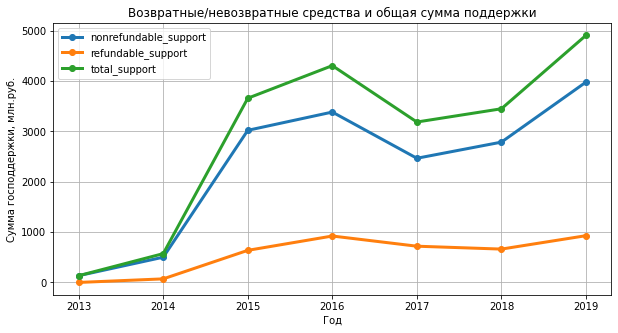

In [83]:
(state_support
 .pivot_table(index='year_release', values=['refundable_support','nonrefundable_support','total_support'], aggfunc='sum')
 .plot(grid=True, figsize=(10, 5), style='-o', linewidth = 3)
)
plt.title('Возвратные/невозвратные средства и общая сумма поддержки')
plt.xlabel('Год')
plt.ylabel('Сумма господдержки, млн.руб.')
plt.show()

Среди типов государственной поддержки и общей суммы гос.средств мы видим схожие тенденции по годам. Начиная с 2014 года значительный рост вплоть до 2016 года, далее заметен спад до 2018 года (что скорее всего объясняется экономической обстановкой в тот период) и к 2019 году значения достигают рекордных сумм.  

На графике отчетливо видно, насколько незначительны объемы выделяемых возвратных средств, относительно невозвратных. Это же подтверждает и таблица выше.  Министерство культуры оказывает поддержку только в форме субсидий – невозвратных средств, за весь период сумма этих средств составила более 4-х миллиардов рублей, Фонд кино выделяет средства как в форме возвратной, таи и на безвозвратной основе (3,6 и 10,6 миллиардов рублей соответственно).

**`Количество фильмов с участие господдержки`**

In [84]:
# количество фильмов с участие господдержки
state_support.pivot_table(index='year_release', values='total_support', aggfunc='count')

,total_support
year_release,
2013,2
2014,16
2015,86
2016,61
2017,41
2018,56
2019,70


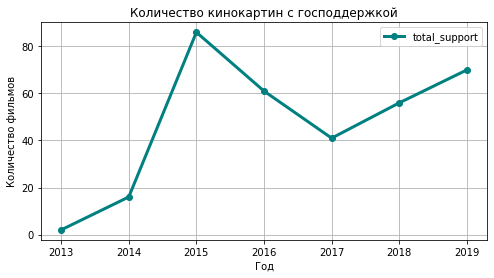

In [85]:
(state_support
 .pivot_table(index='year_release', values='total_support', aggfunc='count')
 .plot(grid=True, figsize=(8, 4), style='-o', linewidth = 3, color='teal')
) 
plt.title('Количество кинокартин с господдержкой')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

Самое большое количество фильмов, выпущенных в релиз, было в 2015 году - 86 кинокартин. При этом, суммы господдержки за этот год не находятся на пиковых значениях.  
2016 и 2018 года приблизительно на одном уровне - 61 и 56 фильмов соответственно.  
Если не брать в расчет начальный период нашей выборки, по которому предоставлен неполный обем данных, то меньше всего фильмов было выпущено в 2017 году - 41 кинокартина. В этом же году объемы государственного финансирования находятся на самом низком уровне, как общая господдержка, так и в разбивке по категориям (возвратное и невозвратное финансирование). Здесь можно проследить закономерность, что чем меньше фильмов, тем меньше сумма государственного финансирования.

**`Жанр`**

In [86]:
# количество фильмов в каждом жанре
# state_support['main_genre'] .value_counts()

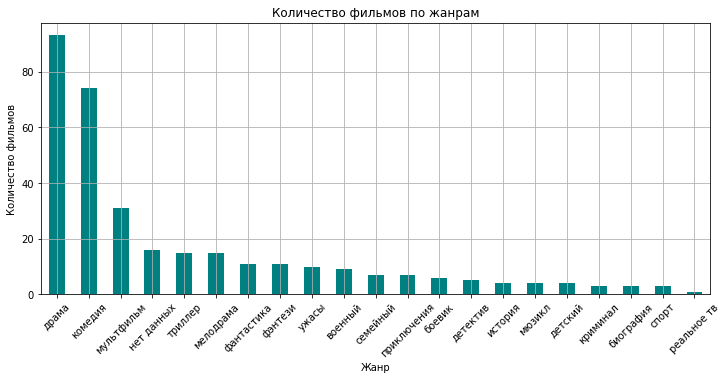

In [87]:
# количество финансируемых фильмов по жанрам
(state_support['main_genre']
 .value_counts()
 .plot(kind='bar', color='teal', grid=True, figsize=(12,5))
)
plt.title('Количество фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

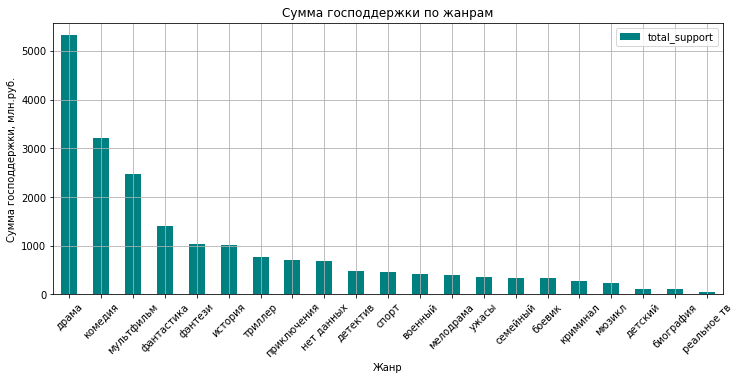

In [88]:
# Объем госфинансирования по жанрам
(state_support
 .pivot_table(index='main_genre', values='total_support', aggfunc='sum')
 .sort_values(by='total_support', ascending=False) 
 .plot(kind='bar', grid=True, color='teal', figsize=(12, 5))
)
plt.title('Сумма господдержки по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма господдержки, млн.руб.')
plt.xticks(rotation=45)
plt.show()

Тройка лидеров по количеству выпускаемых картин и по объемам господдержки в двух таблицах одинаковая.  
На первом месте жанр **`Драма`** - 93 фильма и сумма госфинансирования более 5 миллиардов рублей.  
Далее идет жанр **`Комедия`**, на его финансирование государство выделило немного более 3х миллиардов рублей и студии выпустили в релиз 74 картины.  
И тройку лидеров замыкает жанр **`Мультфильм`** с суммарной господдержкой в размере 2,5 миллиардов рублей и количеством 31.  
Стоить отметить, что в соотношении госбюджета к количеству кинокартин, дороже всех обходиться жанр "Мультфильм", на съемку одной картины выделяют более 80 млн. рублей, тогда как на драму - более 53 млн.руб. и на комедию - около 40 млн. рублей. 

**`Возрастные ограничения`**

In [89]:
# количество фильмов по возрасту
# state_support['age_restriction'] .value_counts()

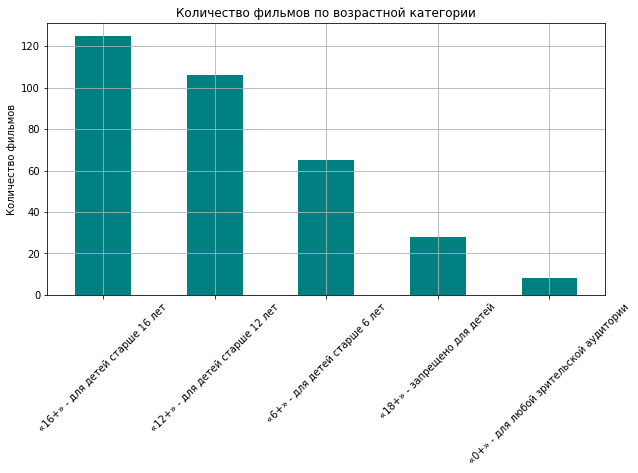

In [90]:
# количество финансируемых фильмов по возрастной категории
(state_support['age_restriction']
 .value_counts()
 .plot(kind='bar', color='teal', grid=True, figsize=(10,5))
)
plt.title('Количество фильмов по возрастной категории')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

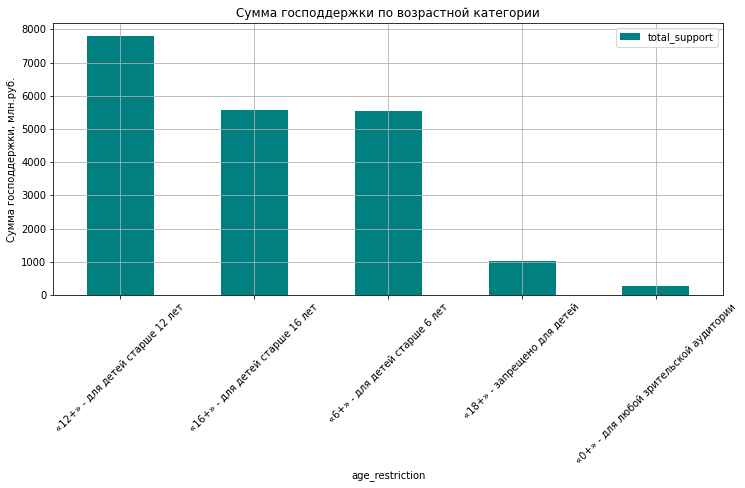

In [91]:
# Объем госфинансирования по возрастной категории
(state_support
 .pivot_table(index='age_restriction', values='total_support', aggfunc='sum')
 .sort_values(by='total_support', ascending=False) 
 .plot(kind='bar', grid=True, color='teal', figsize=(12, 5))
)
plt.title('Сумма господдержки по возрастной категории')
plt.ylabel('Сумма господдержки, млн.руб.')
plt.xticks(rotation=45)
plt.show()

Здесь мы видим иную картину.  
Больше всего фильмов с господдержкой выпущено для возрастной аудитории 16+ (125 картин), на втором месте - фильмы для детей старше 12 лет (106) и на третьем - категория 6+ (65).  
Объемы госфинансирования распределились иначе. Больше всего было выделено средст для фильмов, с возрастным ограничением 12+ (почти 8 млрд.руб.), далее идут категории 16+ и 6+ (приблизительно 5,5 миллиардов рублей).  
В разрезе возрастных ограничений, больше всего выделяют средств на съемку одного фильма категории для детей старше 12 лет - около 74 миллионов рублей, а на сьемку одного фильма категории 16+ - почти в два раза меньше.  
По количеству выпускаемых фильмов и объему господдержки, две крайние категории: 18+ (запрещено для детей) и 0+ (для любой зрительской аудитории) - находятся на последних местах. 

**`Рейтинг`**

In [92]:
# количество фильмов по рейтингу
# state_support['ratings'] .value_counts()

In [93]:
print('Количество фильмов с рейтингом БОЛЬШЕ 7.0: ', len(state_support[state_support['ratings'] >= 7]), 'шт.')
print('Количество фильмов с рейтингом МЕНЬШЕ 7.0: ', len(state_support[state_support['ratings'] < 7]), 'шт.')

Количество фильмов с рейтингом БОЛЬШЕ 7.0:  55 шт.
Количество фильмов с рейтингом МЕНЬШЕ 7.0:  277 шт.


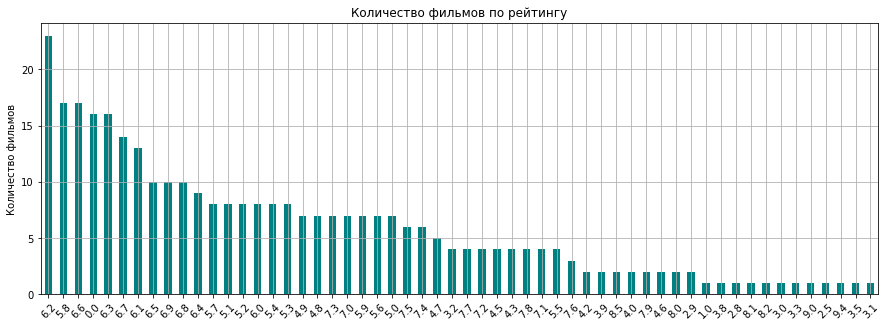

In [94]:
# распределение количество финансируемых фильмов и рейтинг
(state_support['ratings']
 .value_counts()
 .plot(kind='bar', color='teal', grid=True, figsize=(15,5))
)
plt.title('Количество фильмов по рейтингу')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

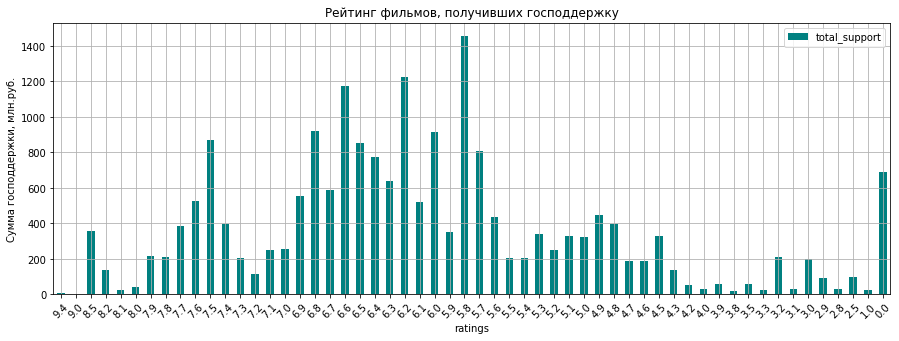

In [95]:
# распределение рейтинга финансируемых фильмов и объем господдержки
(state_support
 .pivot_table(index='ratings', values='total_support', aggfunc='sum')
 .sort_values(by='ratings', ascending=False) 
 .plot(kind='bar', grid=True, color='teal', figsize=(15, 5))
)
plt.title('Рейтинг фильмов, получивших господдержку')
plt.ylabel('Сумма господдержки, млн.руб.')
plt.xticks(rotation=45)
plt.show()

Согласно данным графикам, можно выделить несолько особенностей:  
За весь исследуемый период, 23 кинокартины, снятые с участием средств государственной поддержки, получили рейтинг 6.2 - это самый частовстречающийся рейтинг.   17 фильмов получили рейтинг 5.8 и 6.6  
У большинства кинокартин (277 шт.) рейтинг меньше 7.0  
Фильмы, получившие из госбюджета более 1,4 миллиарда рублей, в прокате получили рейтинг 5.8 . Интересно, что фильмы с высоким рейтингом, выше 8.0,  получили не более 350 миллионов государственного финансирования.  
Стоить уточнить, что рейтинг 0.0 - это фильмы, у которых не было данных о рейтинге.

**Посмотрим на окупаемость фильмов по годам, жанрам, рейтингу и возрастной аудитории.**

In [96]:
# создадим стобцы которые будут отражать окупаемость фильмов
state_support['paid'] = state_support['movie_payback'] > 0
state_support['not_paid'] = state_support['movie_payback'] < 0

**`Окупаемость, относительно года релиза`**

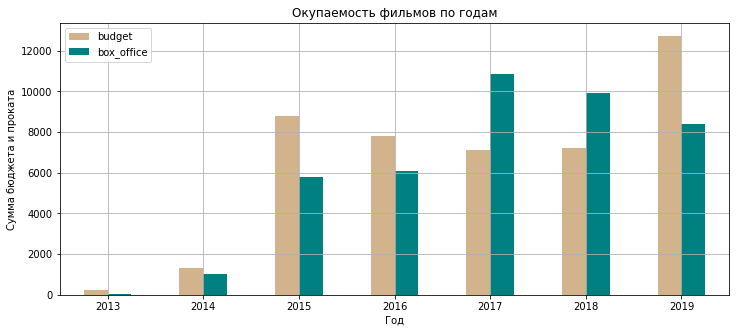

In [97]:
# окупаемость по годам
(state_support
 .groupby('year_release')
 .agg({'budget': 'sum','box_office': 'sum'})
 .plot(kind='bar', figsize=(12,5), grid=True, color=['tan','teal'], y=['budget', 'box_office'])
)
plt.title('Окупаемость фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Сумма бюджета и проката')
plt.xticks(rotation=0)
plt.show()

Данный график хорошо иллюстрирует, что только в 2017 и 2018 году фильмы окупились. По остальным годам, бюджеты фильмов были значительно больше, чем сборы в кинотеатрах.

In [98]:
is_paid = len(state_support[state_support['paid'] == True]) / len(state_support)
print('Окупаемость профинансированных фильмов за исследуемый период: {:.1%}'.format(is_paid))

Окупаемость профинансированных фильмов за исследуемый период: 21.7%


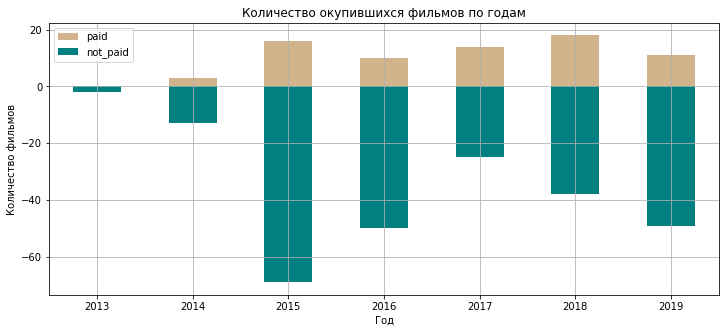

In [99]:
# количество окупившихся фильмов по годам
(state_support
 .groupby('year_release')
 .agg({'title': 'count','paid': 'sum','not_paid': lambda x: 0 - x.sum()})
 .plot(kind='bar', figsize=(12,5), grid=True, stacked=True, color=['tan','teal'], y=['paid', 'not_paid'])
)
plt.title('Количество окупившихся фильмов по годам')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=0)
plt.show()

Окупаемость профинансированных фильмов за весь исследуемый период - 21,7%.  Мы видим, что за каждый год, количество неокупившихся фильмов значительно больше тех, которые принесли прибыли. Как мы уже знаем, самое большое количество фильмов, выпущенных в релиз, было в 2015 году (86 шт.) и из них окупилось только 16 фильмов (или 19%). Более благоприятную картину показывает 2017 год, из 41 фильма, окупилось 14 картин (или 34%).

**`Жанр`**

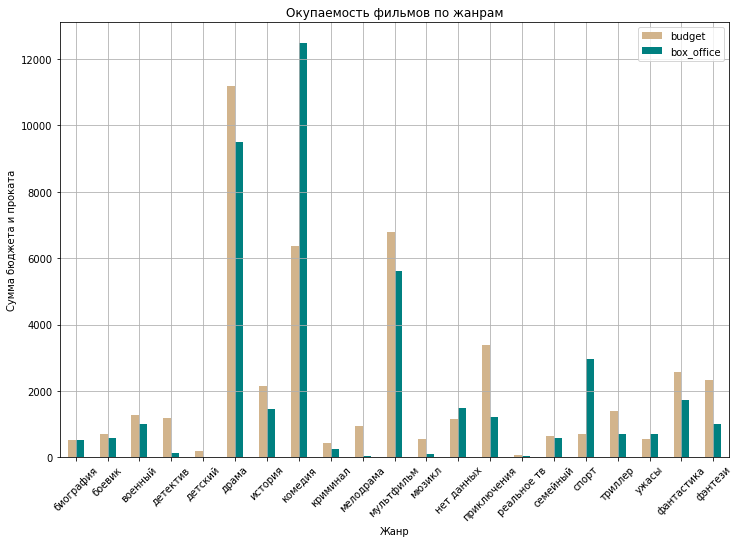

In [100]:
# окупаемость по жанрам
(state_support
 .groupby('main_genre')
 .agg({'budget': 'sum','box_office': 'sum'})
 .plot(kind='bar', figsize=(12,8), grid=True, color=['tan','teal'], y=['budget', 'box_office'])
)
plt.title('Окупаемость фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Сумма бюджета и проката')
plt.xticks(rotation=45)
plt.show()

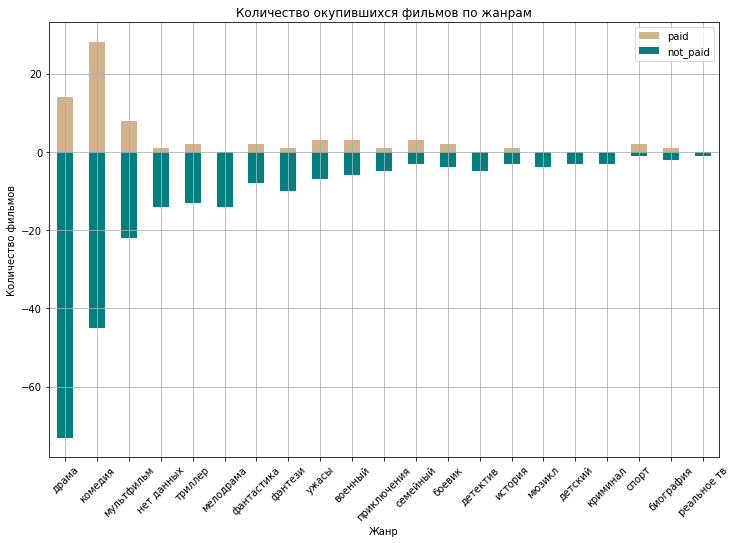

In [101]:
# Количество окупившихся фильмов по жанрам
(state_support
 .groupby('main_genre')
 .agg({'title': 'count', 'paid': 'sum', 'not_paid': lambda x: 0 - x.sum()})
 .sort_values(by='title', ascending=False)
 .plot(kind='bar', figsize=(12,8), grid=True, stacked=True, color=['tan','teal'], y=['paid', 'not_paid'])
)
plt.title('Количество окупившихся фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

Самым успешним жанром оказалась "Комедия". Его прокатные сборы значительно превышают общий бюджет фильмов. Но стоит отметить, что большинство из фильмов этого жанра были убыточными. Из этого следует, что окупившиеся комедии были невероятно успешными в прокате. Среди них такие фильмы, как "Холоп", "Последний богатырь", "Елки новые" и "Елки последние".    

Следующим жанром, чьи доходы превысили бюджет стал "Спорт". Таких фильмов, за исследуемый период, было всего три, но среди них есть фильм "Движение вверх", который при общем бюджете в 590 миллионов рублей, собрал в прокате более 2 миллиардов.  

Жанр "Драма", в котором снимается самое большое число фильмов, и на который выделяется больше всего бюджетных средств, оказался не самым успешным. Общий бюджет значительно превышает прокатные сборы, а из 93-х выпущенных фильмов, окупилось только порядка 15-ти (больше всего прибыли показали фильмы "Экипаж" и "Т-34").

**`Рейтинг`**

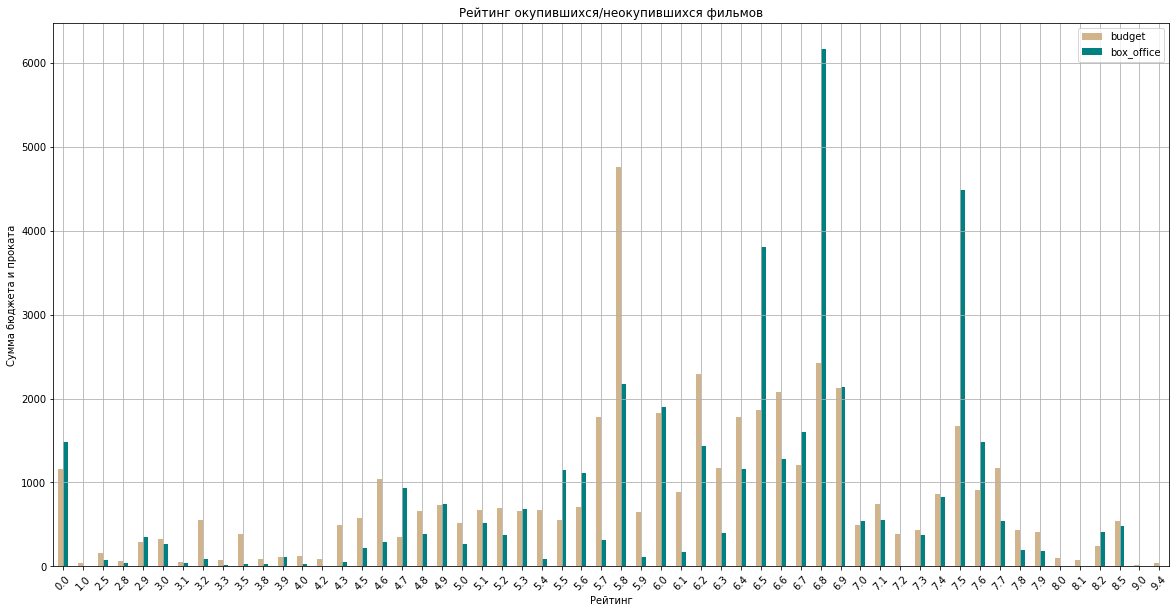

In [102]:
# Рейтинг окупившихся/неокупившихся фильмов
(state_support
 .groupby('ratings')
 .agg({'budget': 'sum','box_office': 'sum'})
 .plot(kind='bar', figsize=(20,10), grid=True, color=['tan','teal'], y=['budget', 'box_office'])
)
plt.title('Рейтинг окупившихся/неокупившихся фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Сумма бюджета и проката')
plt.xticks(rotation=45)
plt.show()

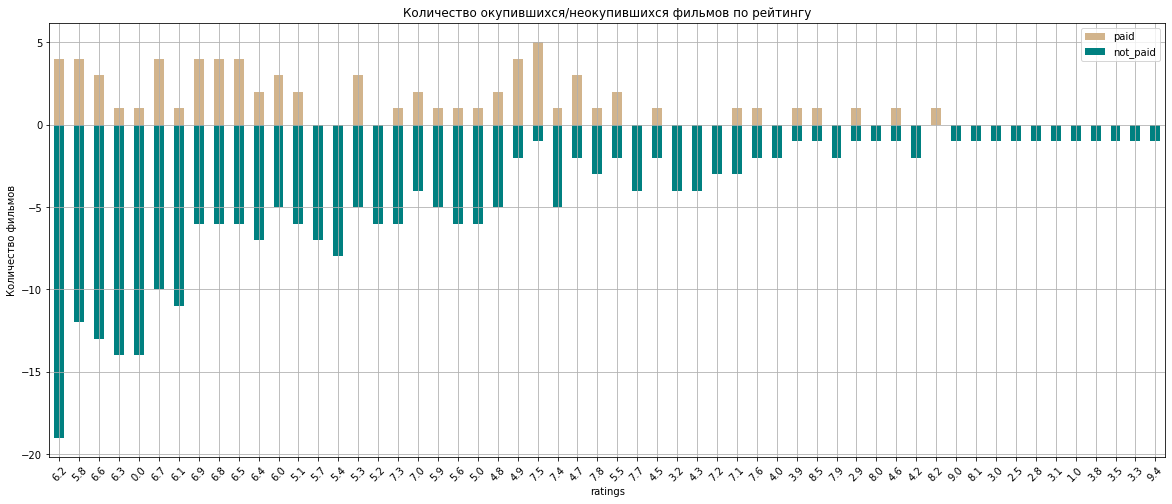

In [103]:
# Количество окупившихся/неокупившихся фильмов по рейтингу
(state_support
 .groupby('ratings')
 .agg({'title': 'count', 'paid': 'sum', 'not_paid': lambda x: 0 - x.sum()})
 .sort_values(by='title', ascending=False)
 .plot(kind='bar', figsize=(20,8), grid=True, stacked=True, color=['tan','teal'], y=['paid', 'not_paid'])
)
plt.title('Количество окупившихся/неокупившихся фильмов по рейтингу')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

Пиковое значение по сборам (более 6 миллиардов рублей) получили фильмы с рейтингом 6.8. Из нижнего графика, мы видим, что их количество незначительно, из 10 фильмов, окупилось 4-ре, что говорит об их успешности в прокате (среди них такие кассовые фильмы как "Последний богатырь" и "Холоп").  

Самый высокий рейтинг, среди окупившихся фильмов, 7.5 . Пять фильмов, с данным рейтингом, из 6-ти - окупились. Среди них "Движение вверх", "Битва за Севастополь" и "28 Панфиловцев".  

Фильмы с рейтингом 5.8 (напомним, что в разрезе рейтингов, фильмы, с рейтингом в прокате 5.8, получили больше всего бюджетных средств - более 1,4 милрд.руб.) показали себя не очень хорошо, из 17-ти фильмов, окупилось только 4. Среди них, лучше всего себя показал фильм "Елки новые". Самый провальный фильм среди неокупившихся - "Тайна Печати Дракона", почти 2 млрд. убытков.

**`Возрастная аудитория`**

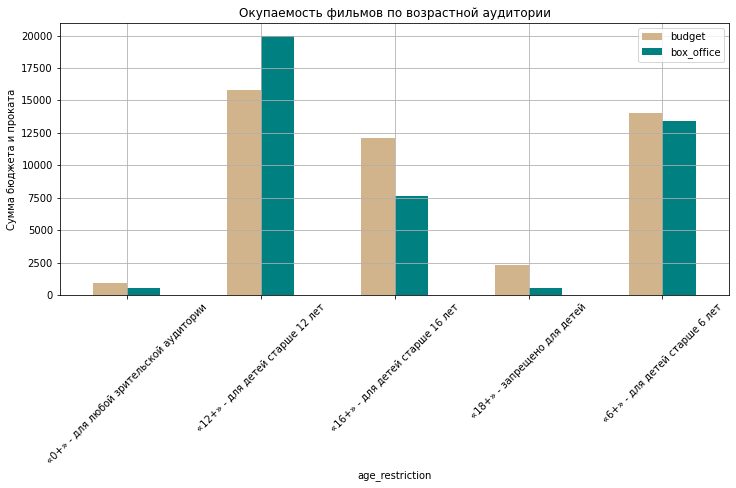

In [104]:
# окупаемость по возрастной аудитории
(state_support
 .groupby('age_restriction')
 .agg({'budget': 'sum','box_office': 'sum'})
 .plot(kind='bar', figsize=(12,5), grid=True, color=['tan','teal'], y=['budget', 'box_office'])
)
plt.title('Окупаемость фильмов по возрастной аудитории')
plt.ylabel('Сумма бюджета и проката')
plt.xticks(rotation=45)
plt.show()

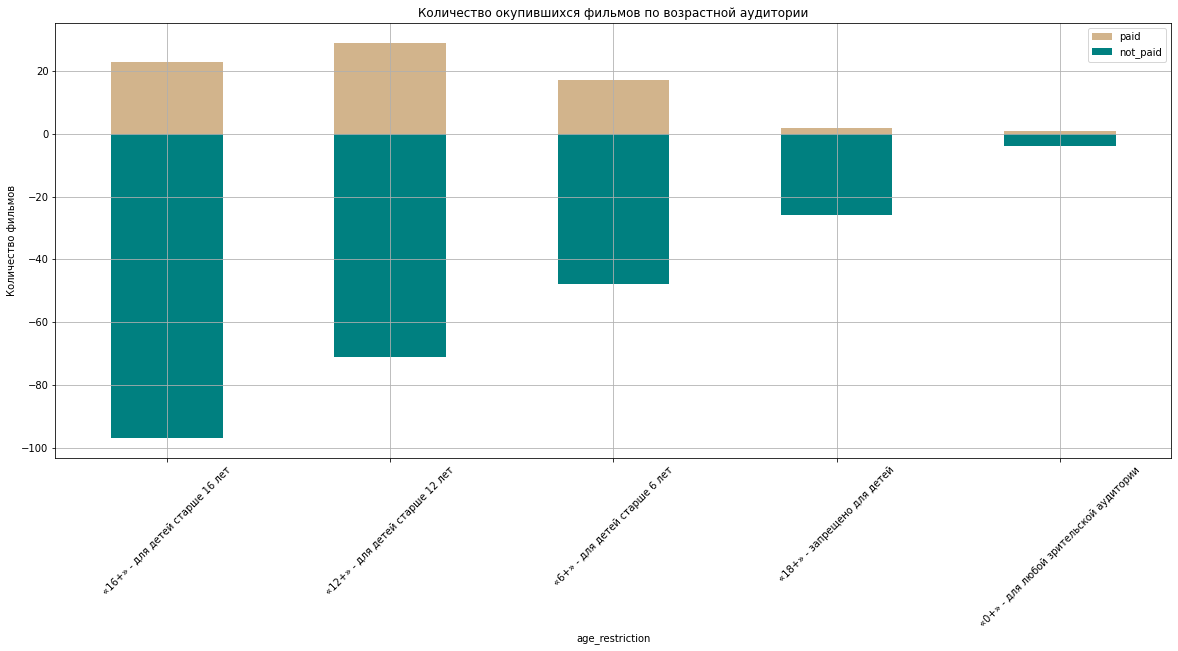

In [105]:
# Количество окупившихся фильмов по возрастной аудитории
(state_support
 .groupby('age_restriction')
 .agg({'title': 'count', 'paid': 'sum', 'not_paid': lambda x: 0 - x.sum()})
 .sort_values(by='title', ascending=False)
 .plot(kind='bar', figsize=(20,8), grid=True, stacked=True, color=['tan','teal'], y=['paid', 'not_paid'])
)
plt.title('Количество окупившихся фильмов по возрастной аудитории')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

Среди возрастных ограничений, единственная окупившаяся категория - «12+» - для детей старше 12 лет.  На нее было выделено и больше всего бюджетных средств, около 8-ми милиардов. Но по количеству картин, мы также видим, что бОльшая часть неокупилась, 71 фильм из 100 (те, у которых есть сведения о сборах).  Лучше всего себя показали фильмы "Лед",  "Последний богатырь" - более одного миллиарда рублей, "Т-34" - более 1,7 млрд.рублей и фильм "Холоп" - почти 3 миллиарда рублей прибыли.  

Для категории 16+ было выпущено больше всего фильмов, ну и тут мы видим картину, что окупилась только меньшая часть - 23 картины из 120. Среди них "Самый лучший день" и "Я худею" (более 500 миллионов прибыли). Хуже всего себя показали фильмы "Матильда и "Грех" - более 500 миллионов убытков.  

Фильмы для детей старше 6-ти лет занимали третье место по количеству снятых фильмов и по объемам выделенного финансирования. Из 65 картин окупилось 17. Самый кассовый среди них - "Движение вверх" (у него же и самый высокий рейтинг 7.5), следом идут "Экипаж" и "Елки новые".  Хуже всего по сборам себя показал фильм "Тайна Печати Дракона", следом идет анимационный фильм "Савва. Сердце воина".

### Шаг 5. Напишите общий вывод

В ходе выполнения ислледования, на этапе предобработки, были заменены типы данных, сократили количество неявных дубликатов, заполнили пропуски. Была выявленна проблема в данных: одно прокатное удостоверение выдано нескольким фильмам; в категориальных переменных - несколько категорий в одной ячейке, перечисленные через запятую, точку или тире; часть рейтингов представленна в процентном выражении.  

-  За весь исследуемый период самое большое количество фильмов выпущено в 2010 году (985 фильмов). Меньше всего картин вышло в релиз в 2017 году (505 шт.), но по сборам этот год показывает один из лучших результатов (более 48 млрд.руб.) и имеет самый большой показатель о количестве фильмов с данными о прокате в кинотеатрах. Самыми кассовыми фильмами стали "Пираты Карибского моря: Мертвецы не рассказывают сказки", "Последний богатырь", "Форсаж 8" и "Притяжение".  

Меньше всего информации о фильмах в 2010-2013гг. Это, скорее всего, связано с внедрением с 2010 года единой информационной системы сведений о показах фильмов в кинозалах и налаживанием процессов их получения.  В среднем, доля фильмов с указанной информацией о прокате в кинотеатрах составляет - 0.43.  

- С каждым годом, сумма прокатных сборов увеличивается. Максимальная сумма сборов была в 2018 году - более 49 миллиардов рублей. 2017 и 2019 года показали суммы сборов в 48,5 млрд.руб.  Минимальные суммы сборов наблюдаются в 2011 и 2012 годах (14 млн.руб. и 10 млн.руб.).  Но стоит отметить, что средние и медианные значения сборов в кинотеатрах в нашем датафрейме необнородны. Это говорит о том, что ежегодные прокатные сборы фильмов могут сильно отличаться, как очень высокие, так и малые значения, что влияет на динамику данных.  

Возрастные ограничения аудитории влияют на сборы фильмов в прокате. Больше всего заработали в прокате фильмы для возрастной аудитории - 16+ (76 миллиардов рублей), с 2016 года имеют самые высокие показатели по сборам. Эта же категория лидирует и по количеству выпущенных картин - 805. Далее идет категория 18+ (792 фильмов) и его положительная динамика сборов по годам (от 5,5 млрд рублей до 10 миллиардов в 2019 году).  Хуже всего себя показали фильмы, подходящие для любого возраста 0+ (800 миллионов рублей), для них же было выпущено и меньше всего картин. Фильмы для детей старше 6 лет начиная с 2015 года показывают положительный рост (более 12 млрд. год к году).  


**`Фильмы, которые получили государственную поддержку.`**  

В России существует два источника распределения государственной финансовой поддержки для создателей кино: Министерство культуры и Фонд кино. Максимальные суммы были выданы в 2019 году - Фонд кино (3,3 млрд.), Министерство культуры - (1,5 млрд.).  Всего, за исследуемый период,государством было выданно финансовой поддержки на сумму более 20 миллиардов рублей. Более 33% фильмов из нашей небольшой выборки снимались с участием возвратных средств, 97% фильмов снималось с использованием невозвратных средств господдержки. Министерство культуры оказывает поддержку только в форме субсидий – невозвратных средств, за весь период сумма этих средств составила более 4-х миллиардов рублей, Фонд кино выделяет средства как в форме возвратной, таи и на безвозвратной основе (3,6 и 10,6 миллиардов рублей соответственно).  

- Самое большое количество фильмов с господдержкой, выпущенных в релиз, было в 2015 году - 86 кинокартин, и из них окупилось только 16 фильмов (или 19%). При этом, суммы господдержки за этот год не находятся на пиковых значениях. Более благоприятную картину показывает 2017 год, из 41 фильма, окупилось порядка 14-ти картин (или 34%). Окупаемость профинансированных фильмов за весь исследуемый период - 21,7%. Ежегодно количество неокупившихся фильмов значительно больше тех, которые принесли прибыли. Только в 2017 и 2018 году фильмы окупились.  

**`Жанр`**   


Самый успешный жанр в прокате - "Комедия". Его сборы значительно превышают общий бюджет фильмов. На его финансирование государство выделило немного более 3х миллиардов рублей и студии выпустили в релиз 74 картины. Но большинство фильмов были убыточными. Из этого следует, что окупившиеся комедии были невероятно успешными в прокате. Среди них такие фильмы, как "Холоп", "Последний богатырь", "Елки новые" и "Елки последние".  
Жанр "Драма", в котором снимается самое большое число фильмов, и на который выделяется больше всего бюджетных средств, оказался не самым успешным. Общий бюджет значительно превышает прокатные сборы, а из 93-х выпущенных фильмов, окупилось только порядка 15-ти (больше всего прибыли показали фильмы "Экипаж" и "Т-34").  
Стоить отметить, что в соотношении госбюджета к количеству кинокартин, дороже всех обходиться жанр "Мультфильм", на съемку одной картины выделяют более 80 млн. рублей, тогда как на драму - более 53 млн.руб. и на комедию - около 40 млн. рублей.  

**`Возрастная категория`** 


Среди возрастных ограничений, единственная окупившаяся категория - «12+» - для детей старше 12 лет.  На нее было выделено и больше всего бюджетных средств, около 8-ми милиардов. По количеству картин, бОльшая их часть неокупилась, 71 фильм из 100.  Лучше всего себя показал фильм "Холоп" - почти 3 миллиарда рублей прибыли, "Т-34" - более 1,7 млрд.рублей и фильмы "Лед" и  "Последний богатырь" - более одного миллиарда рублей .  
Для категории 16+ было выпущено больше всего фильмов, но окупилась только меньшая часть - 23 картины из 120. Среди них "Самый лучший день" и "Я худею" (более 500 миллионов прибыли). Хуже всего себя показали фильмы "Матильда и "Грех" - более 500 миллионов убытков .  
Фильмы для детей старше 6-ти лет занимали третье место по количеству снятых фильмов и по объемам выделенного финансирования. Из 65 картин окупилось 17. Самый кассовый среди них - "Движение вверх" (у него же и самый высокий рейтинг 7.5), следом идут "Экипаж" и "Елки новые".  Хуже всего по сборам себя показал фильм "Тайна Печати Дракона", следом идет анимационный фильм "Савва. Сердце воина".  

**`Рейтинг`**  


У большинства кинокартин (277 шт.) рейтинг меньше 7.0 . За весь исследуемый период, 23 кинокартины, снятые с участием средств государственной поддержки, получили рейтинг 6.2 - это самый частовстречающийся рейтинг. Фильмы, получившие из госбюджета более 1,4 миллиарда рублей, в прокате получили рейтинг 5.8 и показали себя не очень хорошо, из 17-ти фильмов, окупилось только 4. Среди них, лучше всего себя показал фильм "Елки новые". Самый провальный фильм среди неокупившихся - "Тайна Печати Дракона", почти 2 млрд. убытков. Интересно, что фильмы с высоким рейтингом, выше 8.0,  получили не более 350 миллионов государственного финансирования.  Самый высокий рейтинг, среди окупившихся фильмов -  7.5 . Из шести фильмов с данным рейтингом окупилось пять.  Среди них "Движение вверх", "Битва за Севастополь" и "28 Панфиловцев".  